In [1]:
fld = pl.Path('/nfs/grad/surfrad/products_level2/aod3realtime/3.0/tbl/2024/')

In [7]:
# get last file and the 7 before it
i = -1
while True:
    i += 1
    dt = pd.Timestamp.now() - pd.to_timedelta(i, 'd')
    pattern = f'*{dt.year:04d}{dt.month:02d}{dt.day:02d}*'
    # print(pattern)
    res = list(fld.glob(pattern))
    if len(res) > 0:
        break
    else:
        continue

for i in range(30):
    i += 1
    dt = pd.Timestamp.now() - pd.to_timedelta(i, 'd')
    pattern = f'*{dt.year:04d}{dt.month:02d}{dt.day:02d}*'
    # print(pattern)
    res += list(fld.glob(pattern))
    

In [8]:
#res

In [9]:
ds = xr.open_mfdataset(res)

(0.0, 0.2)

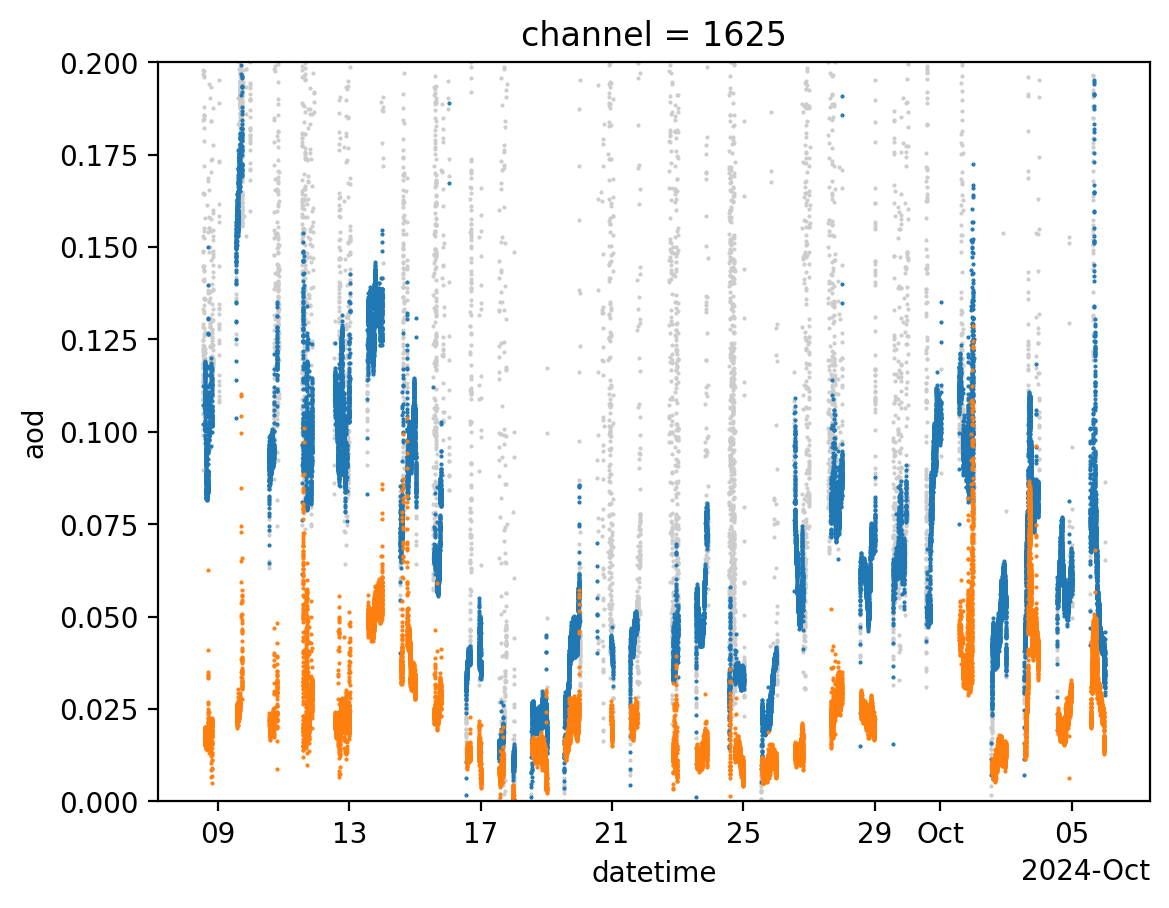

In [10]:
f,a = plt.subplots()
ds.aod.sel(channel = 500).where(ds.cloudmask_michalsky == 1).plot(ls = '', marker = '.', markersize = 1, color = '0.8', ax = a)
ds.aod.sel(channel = 500).where(ds.cloudmask_michalsky == 0).plot(ls = '', marker = '.', markersize = 1, ax = a)
ds.aod.sel(channel = 1625).where(ds.cloudmask_michalsky == 0).plot(ls = '', marker = '.', markersize = 1, ax = a)
# a.set_yscale('log')
a.set_ylim(0,0.2)

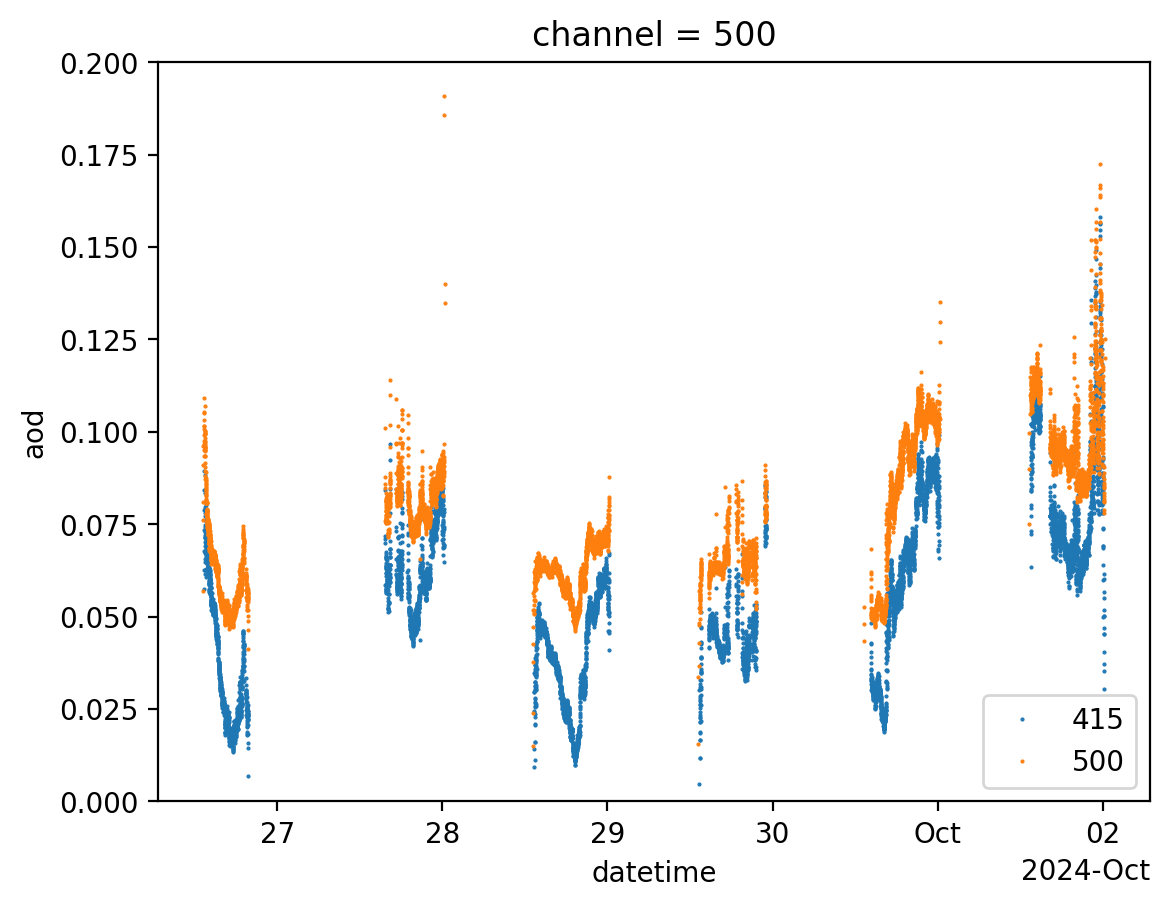

In [55]:
f,a = plt.subplots()
wl = 415
# ds.aod.sel(channel = wl).where(ds.cloudmask_michalsky == 1).plot(ls = '', marker = '.', markersize = 1, color = '0.8', ax = a)
ds.aod.sel(channel = wl).where(ds.cloudmask_michalsky == 0).plot(ls = '', marker = '.', markersize = 1, ax = a, label = wl)
wl = 500
ds.aod.sel(channel = wl).where(ds.cloudmask_michalsky == 0).plot(ls = '', marker = '.', markersize = 1, ax = a, label = wl)
# a.set_yscale('log')
a.set_ylim(0,0.2)
a.legend()

# Langley gam result

In [48]:
fn = '/home/grad/htelg/data/grad/surfrad/mfrsr/langleys_gam_tbl.nc'
with xr.open_dataset(fn) as dsgam:
    dsgam.load()

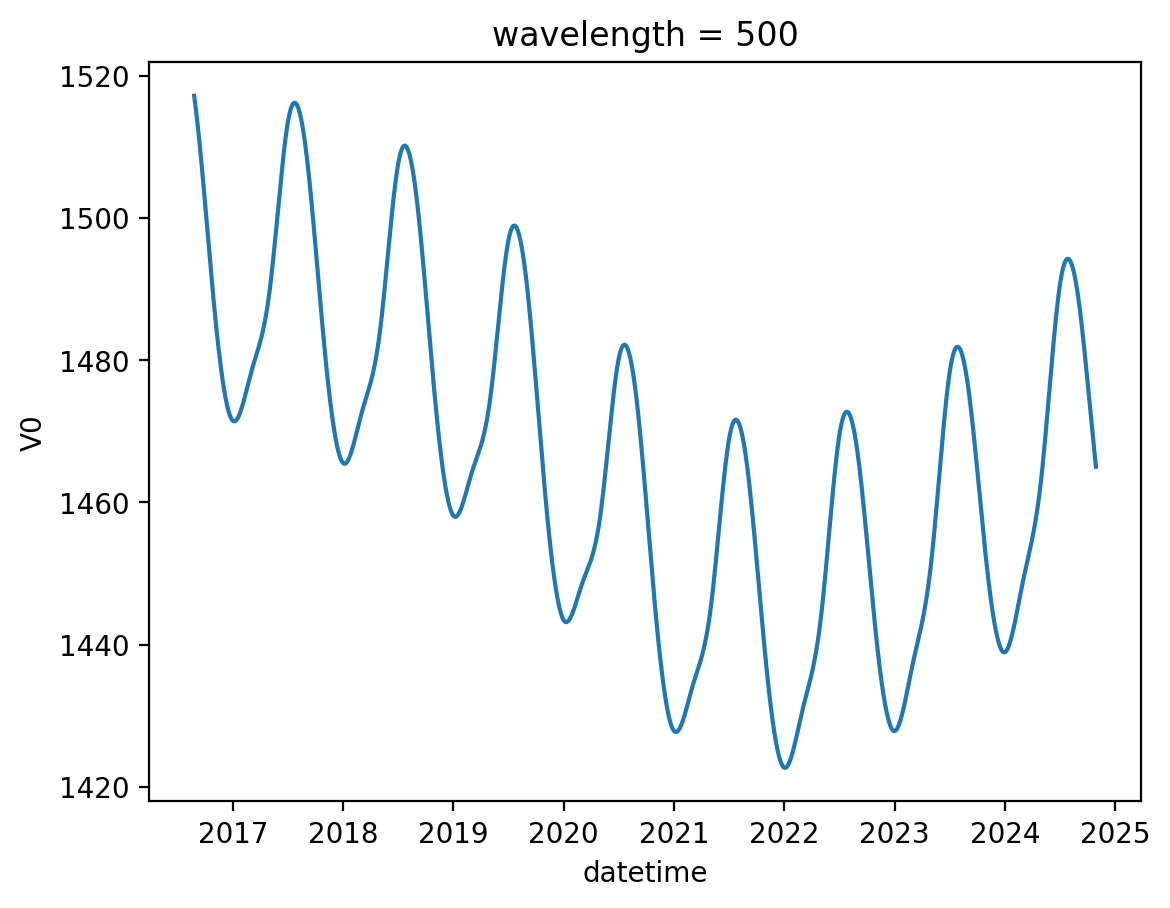

In [51]:
dsgam.V0.sel(wavelength = 500).plot()

# Langleys

In [17]:
import atmPy.radiation.observations.langley_calibration as atmlangcal

In [10]:
p2fn = pl.Path('/home/grad/htelg/data/grad/surfrad/mfrsr/langleys.0.4/tbl/')

In [11]:
p2fl = list(p2fn.glob('*'))

In [12]:
p2fl.sort()

In [22]:
p2f = p2fl[-2]
p2f

PosixPath('/home/grad/htelg/data/grad/surfrad/mfrsr/langleys.0.4/tbl/srf_tbl_mfrsr_0660_20241017_langley_am.nc')

In [23]:
p2f = pl.Path('/home/grad/htelg/data/grad/surfrad/mfrsr/langleys.0.4/tbl/srf_tbl_mfrsr_0660_20241014_langley_am.nc')

In [25]:
with xr.open_dataset(p2f) as ds:
    ds.load()

In [26]:
ds

<xarray.Dataset> Size: 7kB
Dimensions:                            (datetime: 1, airmass: 56,
                                        wavelength: 6, fit_results: 5,
                                        resstats: 3)
Coordinates:
  * datetime                           (datetime) datetime64[ns] 8B 2024-10-14
  * airmass                            (airmass) float64 448B 3.998 ... 2.502
  * wavelength                         (wavelength) int64 48B 415 500 ... 940
  * fit_results                        (fit_results) <U16 320B 'slope' ... 'r...
  * resstats                           (resstats) <U6 72B 'mean' 'median' 'sdt'
Data variables:
    langleys                           (datetime, airmass, wavelength) float64 3kB ...
    langley_fit_residual               (datetime, airmass, wavelength) float64 3kB ...
    langley_fitres                     (datetime, wavelength, fit_results) float64 240B ...
    langley_residual_correlation_prop  (datetime) float64 8B 0.01562
    sp02_serial_no                     (datetime) int64 8B 660
    valid_points                       (datetime) int64 8B 56
    residual_stats                     (datetime, resstats, wavelength) float64 144B ...
    cleaning_iterations                (datetime) int64 8B 0
    status                             (datetime) <U9 36B 'converged'

In [44]:
fit = lambda airmass: ds.langley_fitres.sel(wavelength = wl, fit_results = 'slope') * airmass + ds.langley_fitres.sel(wavelength = wl, fit_results = 'intercept')

(6.15470015599934, 6.284215009012311)

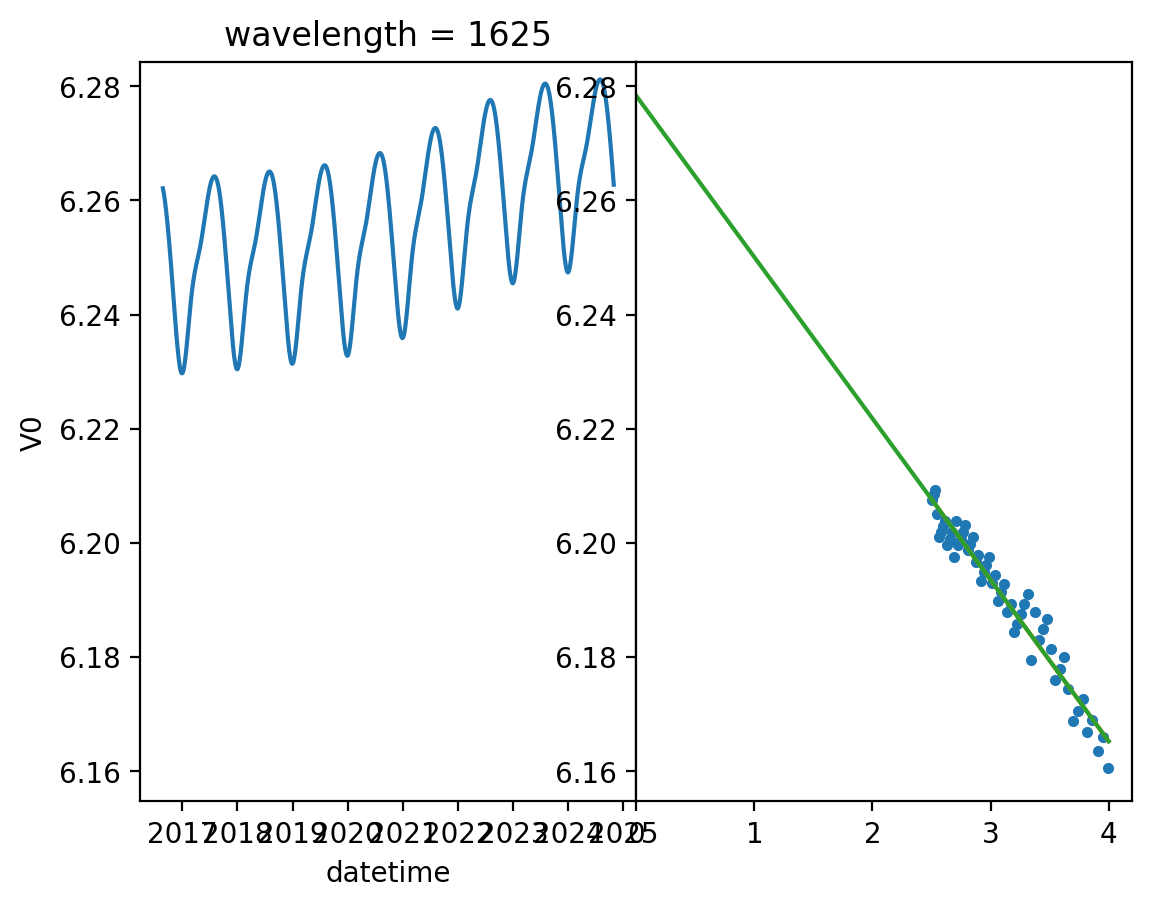

In [61]:
f,aa = plt.subplots(1,2, gridspec_kw={'wspace': 0})
wl = 1625

###################################################
a = aa[1]
a.plot(ds.airmass, ds.langleys.sel(wavelength = wl).isel(datetime = 0), ls = '', marker = '.')
fitres = ds.langleys.sel(wavelength = wl).isel(datetime = 0) - ds.langley_fit_residual.sel(wavelength = wl).isel(datetime = 0) 
a.plot(ds.airmass, fitres
       # , ls = '', marker = '.'
      )
ams = [0,4]
a.plot(ams, [fit(i) for i in ams])
a.set_xlim(left = 0)
#################################################
a = aa[0]
np.log(dsgam.V0.sel(wavelength = wl)).plot(ax = a)

###################################################
aa[0].set_ylim(aa[1].get_ylim())

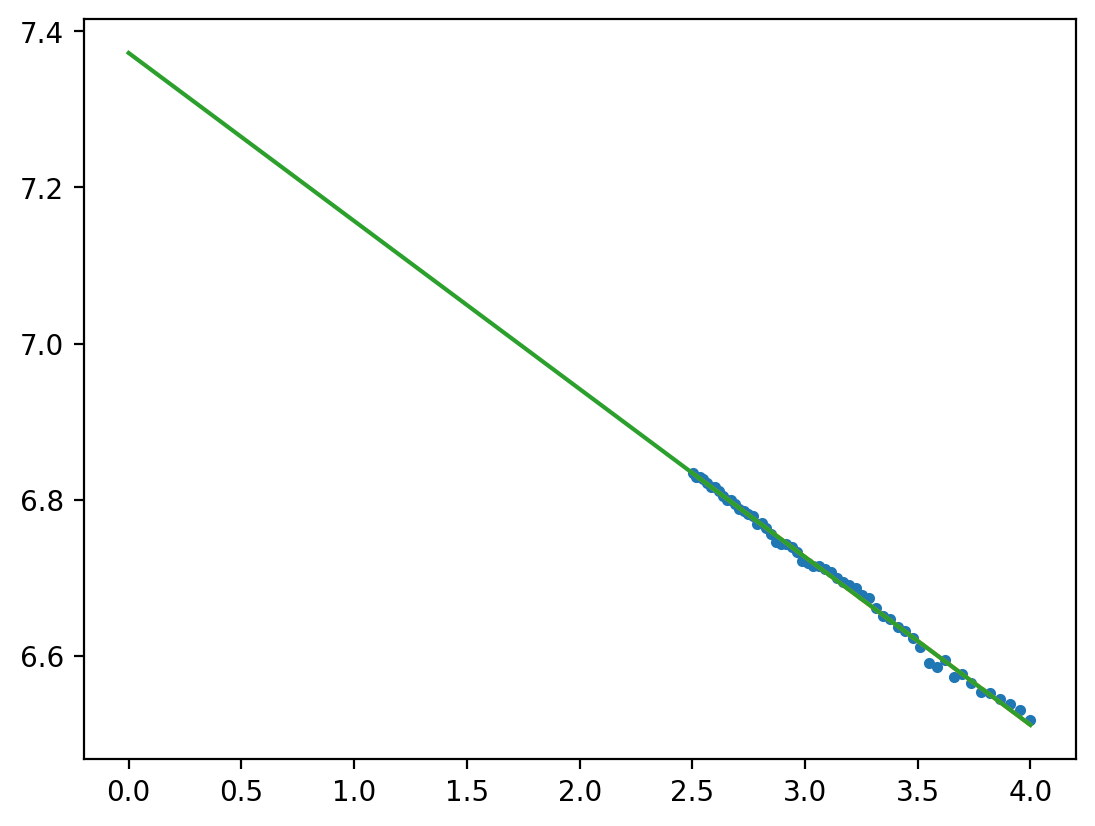

In [47]:
f,a = plt.subplots()
wl = 500
a.plot(ds.airmass, ds.langleys.sel(wavelength = wl).isel(datetime = 0), ls = '', marker = '.')
fitres = ds.langleys.sel(wavelength = wl).isel(datetime = 0) - ds.langley_fit_residual.sel(wavelength = wl).isel(datetime = 0) 
a.plot(ds.airmass, fitres
       # , ls = '', marker = '.'
      )
ams = [0,4]
a.plot(ams, [fit(i) for i in ams])


# Langleys concat

In [1]:
p2fn = pl.Path('/home/grad/htelg/data/grad/surfrad/mfrsr/langleys_concat.0.4/tbl/')

In [2]:
p2fl = list(p2fn.glob('*'))

In [3]:
p2fl.sort()

In [8]:
with xr.open_dataset(p2fl[-2]) as ds:
    ds.load()

In [9]:
ds

<xarray.Dataset> Size: 12kB
Dimensions:                            (datetime: 46, wavelength: 6,
                                        fit_results: 5, resstats: 3)
Coordinates:
  * datetime                           (datetime) datetime64[ns] 368B 2024-09...
  * wavelength                         (wavelength) int64 48B 415 500 ... 940
  * fit_results                        (fit_results) <U16 320B 'slope' ... 'r...
  * resstats                           (resstats) <U6 72B 'mean' 'median' 'sdt'
Data variables:
    langley_fitres                     (datetime, wavelength, fit_results) float32 6kB ...
    langley_residual_correlation_prop  (datetime) float32 184B 0.4551 ... 0.0...
    sp02_serial_no                     (datetime) int32 184B 660 660 ... 660 660
    valid_points                       (datetime) int32 184B 48 48 48 ... 49 51
    residual_stats                     (datetime, resstats, wavelength) float32 3kB ...
    cleaning_iterations                (datetime) int32 184B 0 0 0 1 ... 5 0 2 0
    status                             (datetime) <U9 2kB 'converged' ... 'co...